# D208 Task 2 working

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


# Set pandas option to view all columns
pd.set_option('display.max_columns', None)

## Read in data

In [2]:
#df = pd.read_csv(r'C:\Users\chase\OneDrive\Documents\WGU\Courses\D208\D208_Dataset_Whitman.csv', index_col=[0])

In [3]:
df = pd.read_csv(r"C:\Users\chase\OneDrive\Documents\WGU\Courses\D208\churn_clean.csv")

In [4]:
df.shape

(10000, 50)

In [5]:
df.head(10)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5
5,6,W303516,2b451d12-6c2b-4cea-a295-ba1d6bced078,97598fd95658c80500546bc1dd312994,Fort Valley,GA,Peach,31030,32.57032,-83.89040,17701,Urban,America/New_York,Chief Technology Officer,3,83,22660.20,Never Married,Female,No,8.420993,15,3,1,No,One year,Yes,No,None,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,Electronic Check,7.000994,185.007692,1039.357983,3,3,3,2,4,3,3,3
6,7,U335188,6630d501-838c-4be4-a59c-6f58c814ed6a,87d1c4223e49156020564c01a88973b9,Pioneer,TN,Scott,37847,36.43420,-84.27892,2535,Suburban,America/New_York,"Surveyor, hydrographic",0,79,11467.50,Widowed,Male,Yes,11.182725,10,0,1,Yes,Month-to-month,No,No,DSL,Yes,No,No,No,No,Yes,Yes,Yes,No,Electronic Check,13.236774,200.118516,1907.242972,6,5,6,4,1,5,5,5
7,8,V538685,70ddaa89-b726-49dc-9022-2d655e4c7936,fce3f21888317907de42e298d718ccce,Oklahoma City,OK,Oklahoma,73109,35.43313,-97.52463,23144,Suburban,America/Chicago,Sales promotion account executive,2,30,26759.64,Married,Female,Yes,7.791632,16,0,0,Yes,Month-to-month,No,No,DSL,No,No,No,Yes,No,No,No,No,Yes,Mailed Check,4.264255,114.950905,979.612708,2,2,2,5,2,3,4,5
8,9,M716771,05a49ee3-8fd5-453a-a5f3-82b6cd986856,6c7043ced703b84de29766af3d53c976,Saint Cloud,FL,Osceola,34771,28.27646,-81.16273,17351,Suburban,America/New_York,Teaching laboratory technician,2,49,58634.51,Separated,Nonbinary,No,5.739006,20,2,3,No,Month-to-month,Yes,No,DSL,Yes,No,Yes,Yes,No,No,No,No,Yes,Bank Transfer(automatic),8.220686,117.468591,1312.874964,5,4,4,3,4,3,4,4
9,10,I676080,86f17e4d-2c24-4b70-a6ec-dddf0609dbaa,6ffe183271258a039e122ced8750b2a0,Cincinnati,OH,Hamilton,45237,39.19296,-84.45230,20193,Rural,America/New_York,Museum education officer,1,86,50231.40,Married,Female,No,8.707824,18,1,0,No,Two Year,Yes,No,Fiber Optic,Yes,No,Yes,

## Data Preprocessing

In [6]:
print('Shape of dataframe:')
print('Before drop:', df.shape)

# Drop columns that contain unique values
unique_columns = ['CaseOrder', 'Customer_id', 'Interaction', 'UID']

# Multiple columns are used to decribe location. Timezone will be used as a regional reference.
# The additional location columns will be dropped.
location_columns = ['City', 'State','County', 'Zip', 'Lat', 'Lng', 'Job']

# Apply the drop
df.drop(columns=(unique_columns+location_columns), inplace=True)

print('After drop:', df.shape)

Shape of dataframe:
Before drop: (10000, 50)
After drop: (10000, 39)


In [7]:
# Columns that contain binary values (Y/N)
binary_columns = ['Churn', 'Techie', 'Port_modem', 'Tablet', 'Phone', 'Multiple', 
                  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                  'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

# Convert values to 1s/0s
for col in binary_columns:
    df[col] = df[col].map(dict(Yes=1, No=0))

# Examine results
df[binary_columns].head()

,Churn,Techie,Port_modem,Tablet,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling
0,0,0,1,1,1,0,1,1,0,0,0,1,1
1,1,1,0,1,1,1,1,0,0,0,1,1,1
2,0,1,1,0,1,1,0,0,0,0,0,1,1
3,0,1,0,0,1,0,1,0,0,0,1,0,1
4,1,0,1,0,0,0,0,0,0,1,1,0,0


In [8]:
# One hot encode columns with multiple unique values
dummy_columns = ['Area', 'TimeZone']
df = pd.get_dummies(df, columns=dummy_columns, drop_first=True)

In [9]:
# One hot encode Internet Service based on Fiber Optic and DSL values
df['InternetService_FiberOptic'] = np.where(df.InternetService == 'Fiber Optic', 1, 0)
df['InternetService_DSL'] = np.where(df.InternetService == 'DSL', 1, 0)

# Examine results
print(df[['InternetService', 'InternetService_DSL', 'InternetService_FiberOptic']].head(8))

# Drop original Internet Service column
df.drop(columns='InternetService', inplace=True)

  InternetService  InternetService_DSL  InternetService_FiberOptic
0     Fiber Optic                    0                           1
1     Fiber Optic                    0                           1
2             DSL                    1                           0
3             DSL                    1                           0
4     Fiber Optic                    0                           1
5            None                    0                           0
6             DSL                    1                           0
7             DSL                    1                           0


In [10]:
# One hot encode Gender based on Male and Female
df['Gender_Male'] = np.where(df.Gender == 'Male', 1, 0)
df['Gender_Female'] = np.where(df.Gender == 'Female', 1, 0)

# Examine results
print(df[['Gender', 'Gender_Male', 'Gender_Female']].head(10))

# Drop original Gender column
df.drop(columns='Gender', inplace=True)

      Gender  Gender_Male  Gender_Female
0       Male            1              0
1     Female            0              1
2     Female            0              1
3       Male            1              0
4       Male            1              0
5     Female            0              1
6       Male            1              0
7     Female            0              1
8  Nonbinary            0              0
9     Female            0              1


In [11]:
# Reduce Marital categories into two types: 
#   Married:1 
#   Not Married:0
df['Marital'] = np.where(df.Marital == 'Married',1,0)

In [12]:
# One hot encode Payment Method based on automatic payments or checks
df['PaymentMethod_Auto'] = np.where(np.logical_or(df.PaymentMethod == 'Credit Card (automatic)', 
                       df.PaymentMethod == 'Bank Transfer(automatic)'), 1, 0)
df['PaymentMethod_Check'] = np.where(np.logical_or(df.PaymentMethod == 'Mailed Check', 
                       df.PaymentMethod == 'Electronic Check'), 1, 0)

# Examine results
print(df[['PaymentMethod', 'PaymentMethod_Auto', 'PaymentMethod_Check']].head(8))

# Drop original Payment Method column
df.drop(columns='PaymentMethod', inplace=True)

              PaymentMethod  PaymentMethod_Auto  PaymentMethod_Check
0   Credit Card (automatic)                   1                    0
1  Bank Transfer(automatic)                   1                    0
2   Credit Card (automatic)                   1                    0
3              Mailed Check                   0                    1
4              Mailed Check                   0                    1
5          Electronic Check                   0                    1
6          Electronic Check                   0                    1
7              Mailed Check                   0                    1


In [13]:
# Convert Contract type into numerical values based on the year value
df['Contract'] = df['Contract'].replace({'Month-to-month':0, 'One year':1, 'Two Year':2})

In [14]:
# Examine Results
df.head()

,Population,Children,Age,Income,Marital,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,Area_Suburban,Area_Urban,TimeZone_America/Boise,TimeZone_America/Chicago,TimeZone_America/Denver,TimeZone_America/Detroit,TimeZone_America/Indiana/Indianapolis,TimeZone_America/Indiana/Knox,TimeZone_America/Indiana/Marengo,TimeZone_America/Indiana/Petersburg,TimeZone_America/Indiana/Tell_City,TimeZone_America/Indiana/Vincennes,TimeZone_America/Indiana/Winamac,TimeZone_America/Juneau,TimeZone_America/Kentucky/Louisville,TimeZone_America/Los_Angeles,TimeZone_America/Menominee,TimeZone_America/New_York,TimeZone_America/Nome,TimeZone_America/North_Dakota/New_Salem,TimeZone_America/Ojinaga,TimeZone_America/Phoenix,TimeZone_America/Puerto_Rico,TimeZone_America/Sitka,TimeZone_America/Toronto,TimeZone_Pacific/Honolulu,InternetService_FiberOptic,InternetService_DSL,Gender_Male,Gender_Female,PaymentMethod_Auto,PaymentMethod_Check
0,38,0,68,28561.99,0,0,7.978323,10,0,1,0,1,1,1,1,0,1,1,0,0,0,1,1,6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0
1,10446,1,27,21704.77,1,1,11.699080,12,0,1,1,0,0,1,1,1,1,0,0,0,1,1,1,1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
2,3735,4,50,9609.57,0,0,10.752800,9,0,1,1,2,1,0,1,1,0,0,0,0,0,1,1,15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
3,13863,1,48,18925.23,1,0,14.913540,15,2,0,1,2,0,0,1,0,1,0,0,0,1,0,1,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
4,11352,0,83,40074.19,0,1,8.147417,16,2,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1


In [15]:
df.shape

(10000, 66)

# Exploratory Data Analysis

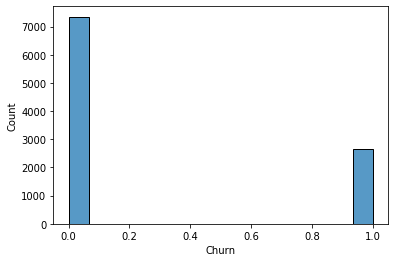

In [16]:
# View histogram of dependent variable: Churn
sns.histplot(df.Churn)

In [17]:
# Heatmap function 
def plot_heatmap(df):
    corr = df.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    f,ax = plt.subplots(figsize=(13,9))
    cmap = sns.diverging_palette(20, 220, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-.5, vmax=.5, center=0,
               square=True, linewidths=.5, cbar_kws={"shrink": .5})
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

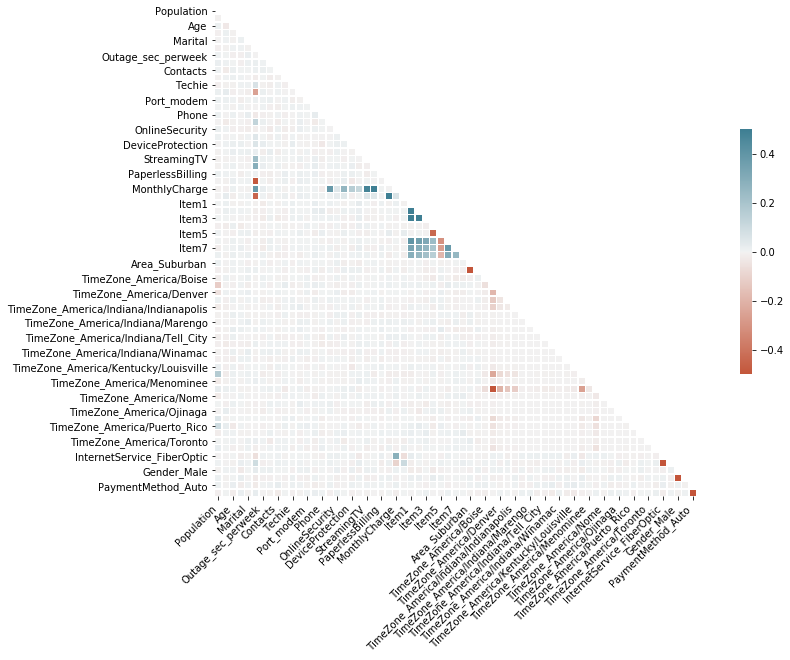

In [18]:
plot_heatmap(df)

In [19]:
# Print out features with correlation values above 0.1
corr_list = df.corr()['Churn'].to_list()
corr_list_features = []
for n in corr_list:
    if abs(n) > 0.1 and abs(n) != 1.0:
        corr_list_features.append(df.columns.to_list()[corr_list.index(n)])
        print(df.columns.to_list()[corr_list.index(n)], n)

Contract -0.2510468732048804
Multiple 0.13177119035819523
StreamingTV 0.23015091412871522
StreamingMovies 0.28926193524692306
Tenure -0.4854750270854005
MonthlyCharge 0.3729378908503732
Bandwidth_GB_Year -0.44166869015315324


In [20]:
def plot_subplots(variable):
    fig, ax = plt.subplots()

    ax.hist(df[df['Churn']==1][variable], bins=10, alpha=0.3, color='blue', label='Churn')
    ax.hist(df[df['Churn']==0][variable], bins=10, alpha=0.3, color='green', label='No Churn')

    ax.set_xlabel(variable)
    ax.set_ylabel('Count of Customers')
    fig.suptitle(f"{variable} vs Churn")
    ax.legend()
    plt.show()

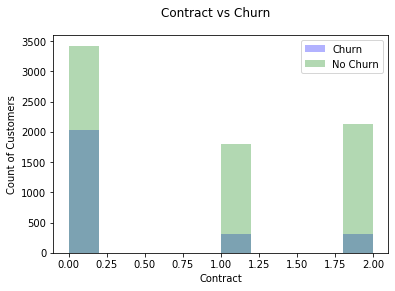

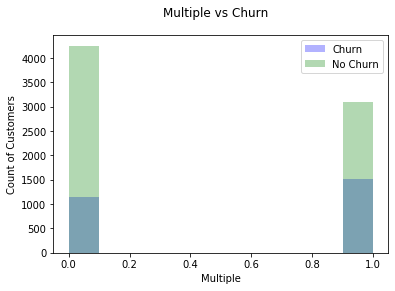

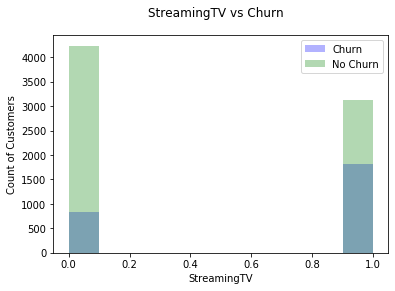

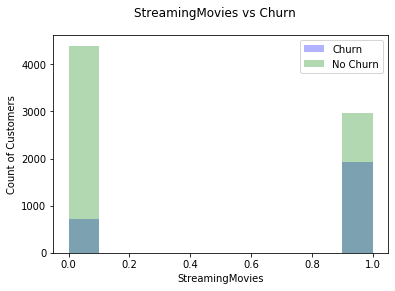

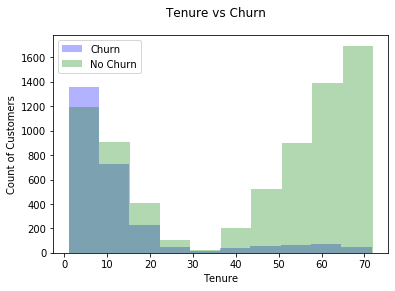

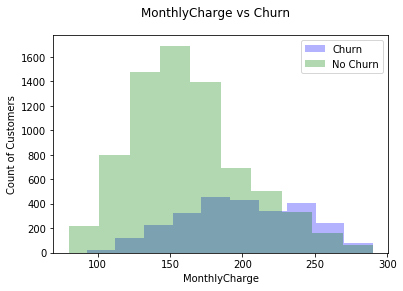

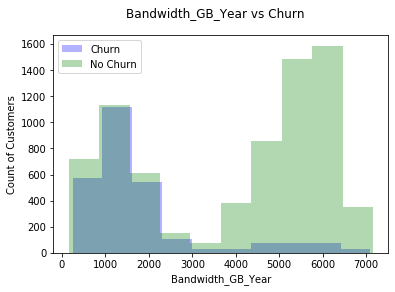

In [21]:
for feature in corr_list_features:
    plot_subplots(feature)

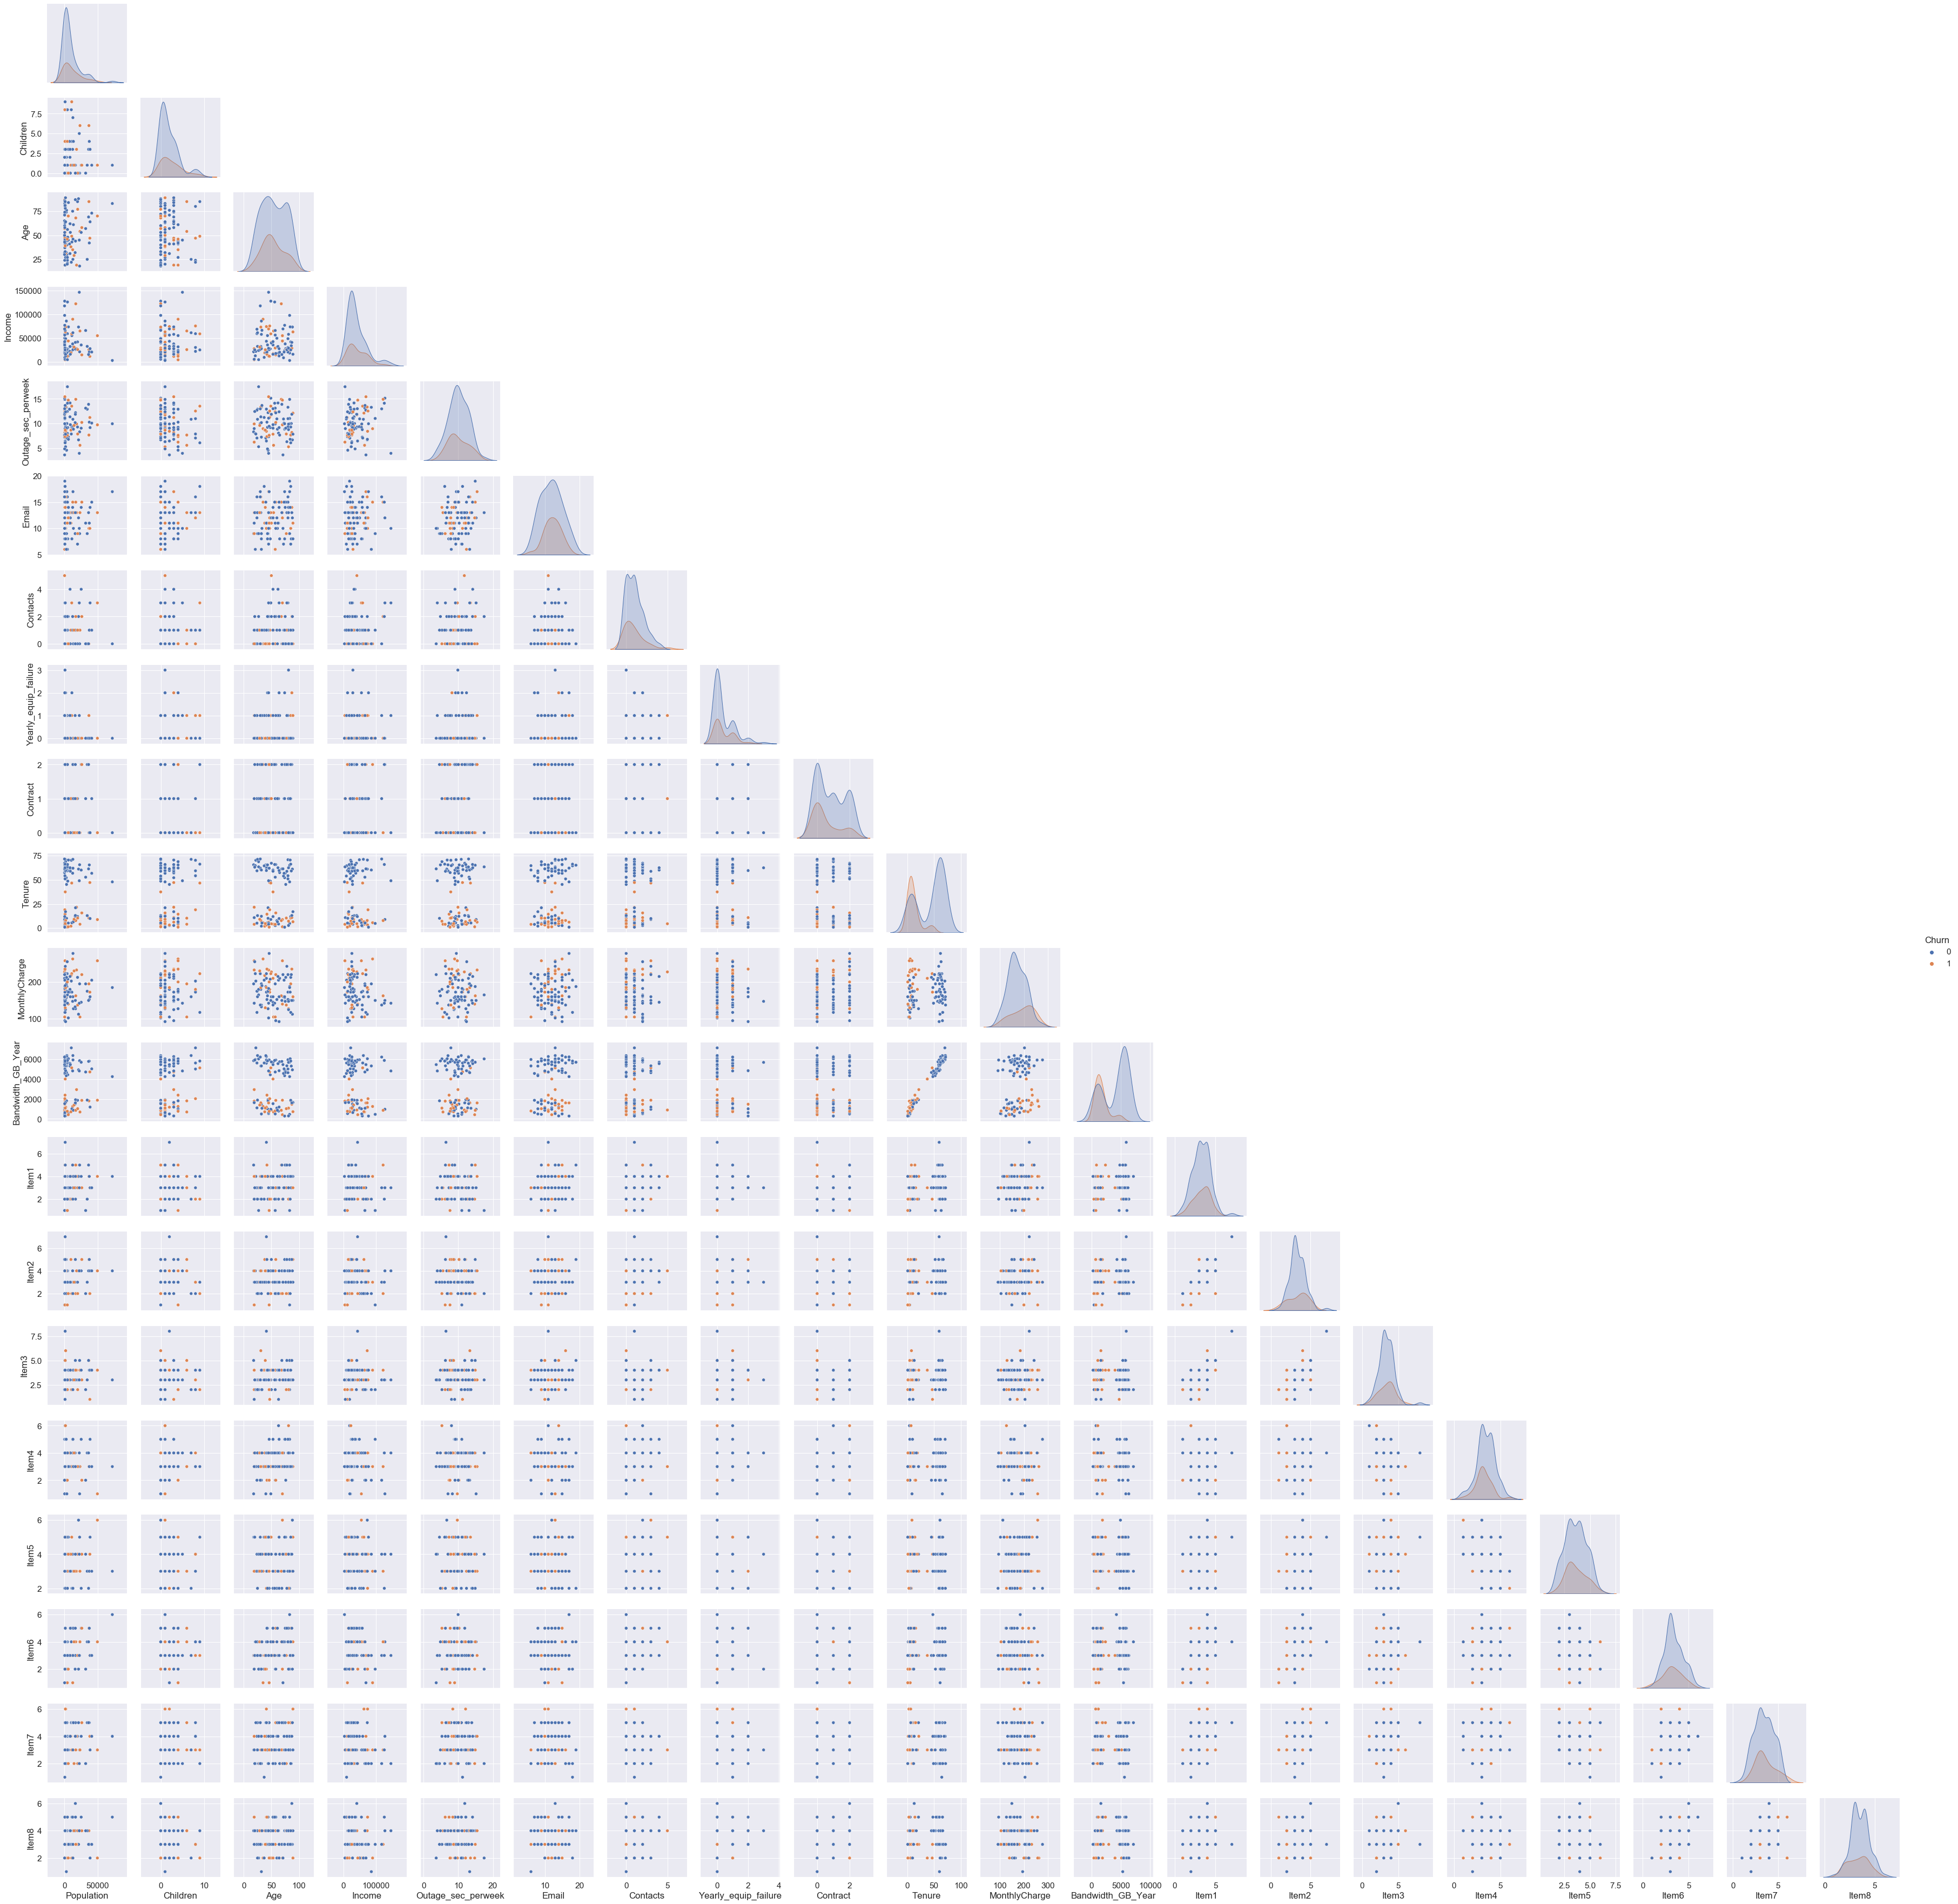

In [22]:
# The following creates a pairplot for all non-binary variables separated by Churn 
c_list = ['Churn']
for col in df.columns:
    if len(df[col].unique()) > 2:
        c_list.append(col)
df_pairplot = df[c_list]

sns.set(font_scale=1.4)
sns.pairplot(data=df_pairplot.sample(100), hue='Churn', corner=True)

## Split and Scale Data

In [23]:
X = df.drop('Churn',1)
y = df[['Churn']]

In [24]:
# Split into train and test datasets
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
# Standardize data using Standard Scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

# Scoring Results

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [27]:
# Function for individual model results
def print_results(model, y_test, predictions):
    print('--------- The model produced the following coefficients: ----------\n')
    print(model.coef_,)
    print('\n\n------------------ Classification Report: ---------------------')
    print(classification_report(y_test, predictions))    

In [28]:
# Function to compare two models
def compare_results(predictions1, predictions2):
    print('-------- Confusion Matrix --------')
    print('Initial:')
    print(confusion_matrix(y_test, predictions1))
    print('\nTuned:')
    print(confusion_matrix(y_test, predictions2))
    
    print('\n-------- Accuracy Score --------')
    print('Initial:', accuracy_score(y_test, predictions1))
    print('Tuned:', accuracy_score(y_test, predictions2))
    
    print('\n-------- F1 Score --------')
    print('Initial:', f1_score(y_test, predictions1))
    print('Tuned:', f1_score(y_test, predictions2))
    
    print('\n-------- Precision Score --------')
    print('Initial:', precision_score(y_test, predictions1))
    print('Tuned:', precision_score(y_test, predictions2))
    
    print('\n-------- Recall Score --------')
    print('Initial:', recall_score(y_test, predictions1))
    print('Tuned:', recall_score(y_test, predictions2))

## Create Models

### Initial multiple logistic regression

In [29]:
# Initial logistic regression function
def logistic_regression(X_train, X_test, y_train):
    model = LogisticRegression().fit(X_train, y_train)
    predictions = model.predict(X_test)
    return model, predictions

In [30]:
initial_log, initial_pred = logistic_regression(X_train, X_test, y_train)

print_results(initial_log, y_test, initial_pred)

--------- The model produced the following coefficients: ----------

[[ 7.76838203e-04  3.46229845e-02 -7.98706730e-03  3.00501263e-02
  -3.23330818e-04 -1.41986723e-02  3.48853310e-03  2.86566660e-02
  -3.47883062e-02  4.04595877e-01 -1.63425038e+00  6.94028154e-02
  -6.60607880e-02 -1.40207833e-01  1.26222735e-01 -6.19314057e-02
  -5.49330674e-02 -4.52659204e-02 -1.56927296e-01  6.23616159e-01
   6.36844583e-01  9.62484812e-02 -1.51269001e+00  1.75884136e+00
  -1.42156283e+00  7.83357955e-03 -3.31786756e-02 -4.35834861e-02
  -1.00653335e-02 -3.05419344e-02 -6.38259494e-03 -1.14076556e-02
  -2.25028226e-02 -3.26976686e-02 -2.00799254e-02  1.50925176e-02
   3.99832277e-02 -9.27462877e-04  3.00067060e-02 -1.13068755e-02
  -4.81242702e-02 -7.51494365e-03  1.27246745e-01 -1.41575957e-03
   1.88130870e-03 -1.66394393e-02 -1.25703879e-01  3.94275875e-02
   6.23395626e-02  2.42792464e-02  8.67152979e-02 -8.08747657e-02
  -6.96142102e-02 -1.15393005e-02  1.48222197e-02 -1.68055422e-02
   7.24

C:\Users\chase\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Reduced multiple logistic regression

In [31]:
from sklearn.model_selection import GridSearchCV 

# Perform grid search to tune hyper-parameters
penalty = ['l1'] 
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000] 
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}] 
solver = ['liblinear', 'saga'] 
param_grid = dict(penalty=penalty, 
                  C=C, 
                  class_weight=class_weight, 
                  solver=solver) 
logistic = LogisticRegression() 
grid = GridSearchCV(estimator=logistic, 
                    param_grid=param_grid, 
                    scoring='roc_auc', 
                    verbose=1, 
                    n_jobs=-1) 
grid_result = grid.fit(X_train, y_train) 
print('Best Score: ', grid_result.best_score_) 
print('Best Params: ', grid_result.best_params_) 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 289 out of 320 | elapsed:   46.2s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  2.6min finished
C:\Users\chase\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Score:  0.9564953585388709
Best Params:  {'C': 0.1, 'class_weight': {1: 0.5, 0: 0.5}, 'penalty': 'l1', 'solver': 'liblinear'}


In [32]:
# Create new logistic regression model using best hyperparameters
def tuned_log_reg(model, X_train, X_test, y_train):
    c = model['C']
    class_weight = model['class_weight']
    penalty = model['penalty']
    solver = model['solver']
    logreg = LogisticRegression(C=c, 
                                class_weight=class_weight, 
                                penalty=penalty, 
                                solver=solver).fit(X_train, y_train)
    pred = logreg.predict(X_test)
    return logreg, pred

In [33]:
tuned_log, tuned_pred = tuned_log_reg(grid_result.best_params_, X_train, X_test, y_train)
print_results(tuned_log, y_test, tuned_pred)

--------- The model produced the following coefficients: ----------

[[ 0.00000000e+00  0.00000000e+00  3.89493369e-04  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  3.13597282e-01 -1.37862066e+00  1.98016867e-02
  -2.83864273e-02 -9.38725475e-02  1.37700084e-01 -4.13628932e-02
   0.00000000e+00  0.00000000e+00 -8.22988963e-02  5.46472829e-01
   5.87440147e-01  4.53414634e-02 -2.47386988e+00  1.32430224e+00
   0.00000000e+00  0.00000000e+00 -1.43484578e-02 -1.36012600e-02
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  2.09918757e-02  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -3.26402964e-02  2.88310177e-03
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.68555057e-02
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00

C:\Users\chase\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Compare Results Between Models

In [34]:
compare_results(initial_pred, tuned_pred)

-------- Confusion Matrix --------
Initial:
[[2027  129]
 [ 191  653]]

Tuned:
[[2033  123]
 [ 182  662]]

-------- Accuracy Score --------
Initial: 0.8933333333333333
Tuned: 0.8983333333333333

-------- F1 Score --------
Initial: 0.8031980319803198
Tuned: 0.8127685696746471

-------- Precision Score --------
Initial: 0.8350383631713555
Tuned: 0.8433121019108281

-------- Recall Score --------
Initial: 0.773696682464455
Tuned: 0.7843601895734598


### Identify Features and Coefficient Values After L1 Regularization

In [35]:
# Identify which features were dropped/retained 
# Creates a dictionary for retained features and their coefficients
# and a list of dropped features
features_dict = {}
dropped_features = []
for n in range(len(tuned_log.coef_[0])):
    if tuned_log.coef_[0][n] != 0.0:
        features_dict[X.columns[n]] = tuned_log.coef_[0][n]
    else:
        dropped_features.append(X.columns[n])

In [36]:
features_dict

{'Age': 0.00038949336938499355,
 'Techie': 0.3135972818792876,
 'Contract': -1.3786206569166646,
 'Port_modem': 0.019801686747164544,
 'Tablet': -0.028386427251130147,
 'Phone': -0.09387254747075303,
 'Multiple': 0.1377000840068418,
 'OnlineSecurity': -0.04136289316763417,
 'TechSupport': -0.08229889632547692,
 'StreamingTV': 0.5464728291365606,
 'StreamingMovies': 0.5874401467746583,
 'PaperlessBilling': 0.0453414634472929,
 'Tenure': -2.4738698823459155,
 'MonthlyCharge': 1.3243022446555406,
 'Item2': -0.014348457780973208,
 'Item3': -0.013601260023005844,
 'TimeZone_America/Indiana/Petersburg': 0.0209918757215223,
 'TimeZone_America/Juneau': -0.032640296439602735,
 'TimeZone_America/Kentucky/Louisville': 0.00288310177160361,
 'TimeZone_America/Nome': -0.026855505698154668,
 'InternetService_FiberOptic': -0.4678485608943409,
 'InternetService_DSL': 0.3268546476388428,
 'Gender_Male': 0.07558291629407005,
 'PaymentMethod_Auto': -0.09628560780975783,
 'PaymentMethod_Check': 0.026968123

In [37]:
# Print the retained features and their coefficients after L1 Regularization
{k: v for k,v in sorted(features_dict.items(), key=lambda item: abs(item[1]), reverse=True)}

{'Tenure': -2.4738698823459155,
 'Contract': -1.3786206569166646,
 'MonthlyCharge': 1.3243022446555406,
 'StreamingMovies': 0.5874401467746583,
 'StreamingTV': 0.5464728291365606,
 'InternetService_FiberOptic': -0.4678485608943409,
 'InternetService_DSL': 0.3268546476388428,
 'Techie': 0.3135972818792876,
 'Multiple': 0.1377000840068418,
 'PaymentMethod_Auto': -0.09628560780975783,
 'Phone': -0.09387254747075303,
 'TechSupport': -0.08229889632547692,
 'Gender_Male': 0.07558291629407005,
 'PaperlessBilling': 0.0453414634472929,
 'OnlineSecurity': -0.04136289316763417,
 'TimeZone_America/Juneau': -0.032640296439602735,
 'Tablet': -0.028386427251130147,
 'PaymentMethod_Check': 0.026968123164282067,
 'TimeZone_America/Nome': -0.026855505698154668,
 'TimeZone_America/Indiana/Petersburg': 0.0209918757215223,
 'Port_modem': 0.019801686747164544,
 'Item2': -0.014348457780973208,
 'Item3': -0.013601260023005844,
 'TimeZone_America/Kentucky/Louisville': 0.00288310177160361,
 'Age': 0.00038949336

In [38]:
print(f'Feature selection resulted in dropping {len(dropped_features)} of {X.shape[1]} features.\n')
print('The following features were dropped:\n') 
print(dropped_features)

Feature selection resulted in dropping 40 of 65 features.

The following features were dropped:

['Population', 'Children', 'Income', 'Marital', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'OnlineBackup', 'DeviceProtection', 'Bandwidth_GB_Year', 'Item1', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8', 'Area_Suburban', 'Area_Urban', 'TimeZone_America/Boise', 'TimeZone_America/Chicago', 'TimeZone_America/Denver', 'TimeZone_America/Detroit', 'TimeZone_America/Indiana/Indianapolis', 'TimeZone_America/Indiana/Knox', 'TimeZone_America/Indiana/Marengo', 'TimeZone_America/Indiana/Tell_City', 'TimeZone_America/Indiana/Vincennes', 'TimeZone_America/Indiana/Winamac', 'TimeZone_America/Los_Angeles', 'TimeZone_America/Menominee', 'TimeZone_America/New_York', 'TimeZone_America/North_Dakota/New_Salem', 'TimeZone_America/Ojinaga', 'TimeZone_America/Phoenix', 'TimeZone_America/Puerto_Rico', 'TimeZone_America/Sitka', 'TimeZone_America/Toronto', 'TimeZone_Pacific/Honolulu', 'Gender_Fe

In [39]:
# Print logistic regression formula
formula = f'{round(tuned_log.intercept_[0],5)}'
for k,v in sorted(features_dict.items(), key=lambda item: abs(item[1]), reverse=True):
    v = round(v, 5)
    if v > 0:
        formula += f' + {str(v)}({k})'
    else:
        formula += f' - {str(abs(v))}({k})'

print('{} Logistic Regression Formula {}\n'.format('-'*45, '-'*45))
print(f"Log[Y/1-Y] = {formula}")

--------------------------------------------- Logistic Regression Formula ---------------------------------------------

Log[Y/1-Y] = -2.66705 - 2.47387(Tenure) - 1.37862(Contract) + 1.3243(MonthlyCharge) + 0.58744(StreamingMovies) + 0.54647(StreamingTV) - 0.46785(InternetService_FiberOptic) + 0.32685(InternetService_DSL) + 0.3136(Techie) + 0.1377(Multiple) - 0.09629(PaymentMethod_Auto) - 0.09387(Phone) - 0.0823(TechSupport) + 0.07558(Gender_Male) + 0.04534(PaperlessBilling) - 0.04136(OnlineSecurity) - 0.03264(TimeZone_America/Juneau) - 0.02839(Tablet) + 0.02697(PaymentMethod_Check) - 0.02686(TimeZone_America/Nome) + 0.02099(TimeZone_America/Indiana/Petersburg) + 0.0198(Port_modem) - 0.01435(Item2) - 0.0136(Item3) + 0.00288(TimeZone_America/Kentucky/Louisville) + 0.00039(Age)
